In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


Understanding the dataset¶

In [ ]:
df.shape

(5630, 20)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

From the preliminary Data set we can see that there are certain missing values. There are no duplicate entries.

There are 5630 rows and 20 columns.

Looking at the Data types, it doesnt look like there's any anomaly in the values in the dataset.

Checking for the Data Hygiene in the dataset -> Lets see the value counts of each of the categorical variables

In [ ]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:') 
        print(df[i].value_counts())
        print()
        print()

PreferredLoginDevice

the values are:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


PreferredPaymentMode

the values are:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Gender

the values are:
Male      3384
Female    2246
Name: Gender, dtype: int64


PreferedOrderCat

the values are:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


MaritalStatus

the values are:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




The variables above look fine hence there is no need to do anything from the perspective of data hygiene

#Handling the Missing Values


Copying the data frame into another one

In [ ]:
df1=df.copy()

In [ ]:
df.drop(['CustomerID'],axis=1, inplace=True)

Lets first single out those variables where there are missing values:

In [ ]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print('the total null values are:', df[i].isnull().sum())
        print('the datatype is', df[i].dtypes)
        print()

Tenure
the total null values are: 264
the datatype is float64

WarehouseToHome
the total null values are: 251
the datatype is float64

HourSpendOnApp
the total null values are: 255
the datatype is float64

OrderAmountHikeFromlastYear
the total null values are: 265
the datatype is float64

CouponUsed
the total null values are: 256
the datatype is float64

OrderCount
the total null values are: 258
the datatype is float64

DaySinceLastOrder
the total null values are: 307
the datatype is float64



Also converting the Churn variable to object

In [ ]:
df['Churn'] = df['Churn'].astype('object')
df['CityTier'] = df['CityTier'].astype('object')

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00
OrderCount,5372.0,3.008004,2.939680,1.0,1.00,2.00,3.0000,16.00


First lets go about filling the missing values by the median values -> Mean and median values are very close for all the above variables hence we will prefer filling the median values.

In [ ]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].median(),inplace=True)

#Outlier Treatment

We will now treat outliers. For this we will define the lower range and upper range which is going to be at a distnace of 1.5 times the Interquartile range from the respective whiskers

Text(0, 0.5, 'Values')

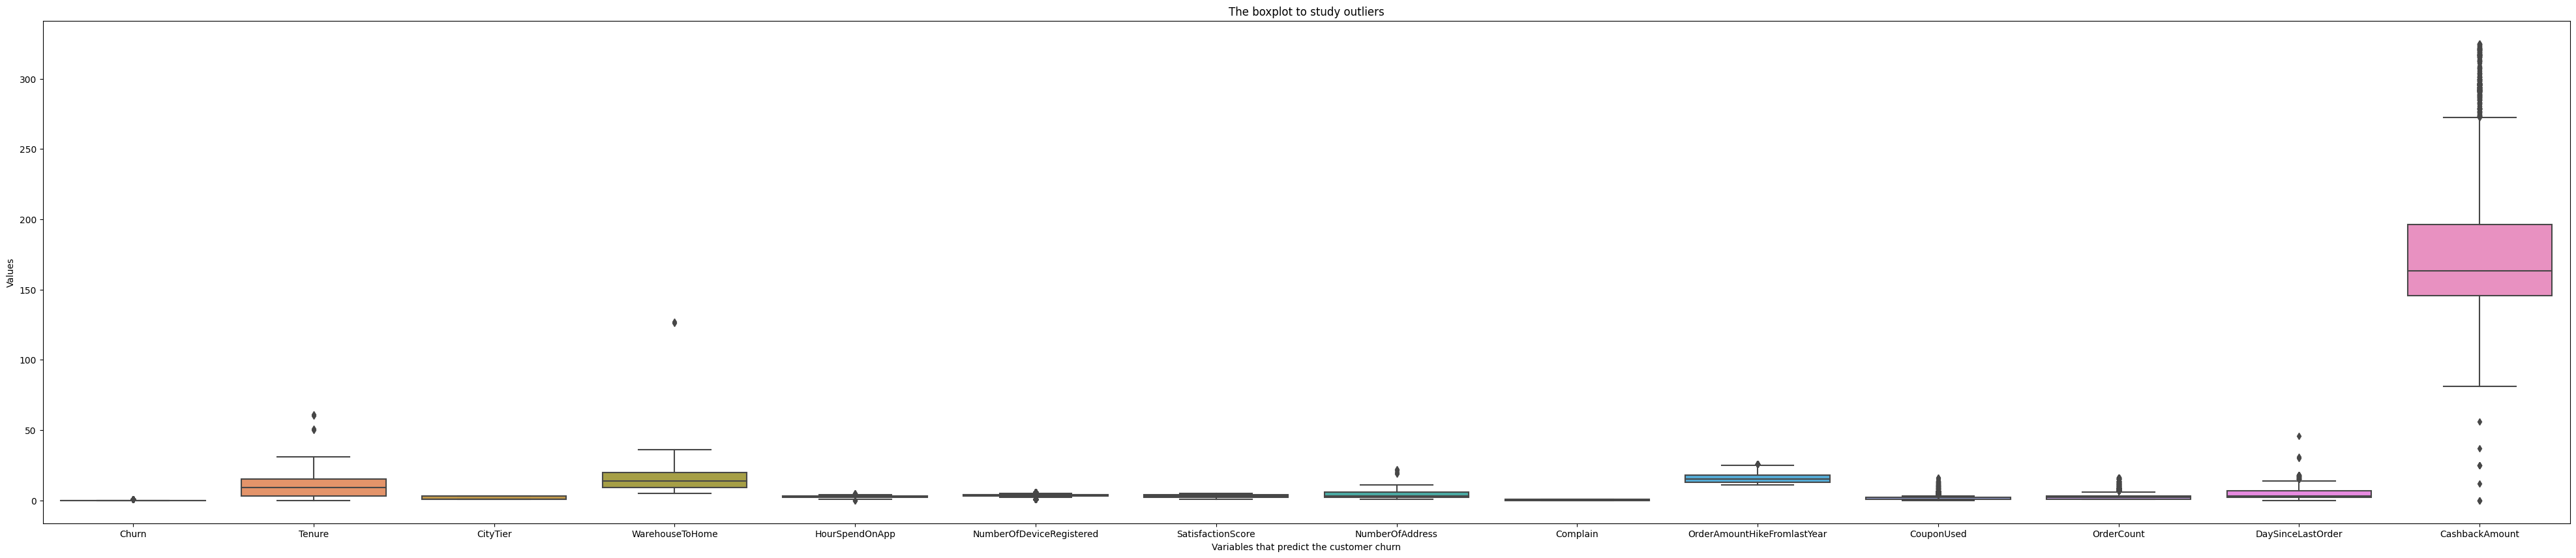

In [ ]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

Here we can see that there are quite a lot of outliers in almost all of the variables. Lets treat these outliers

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [ ]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
for column in df.columns:
    if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

Text(0, 0.5, 'Values')

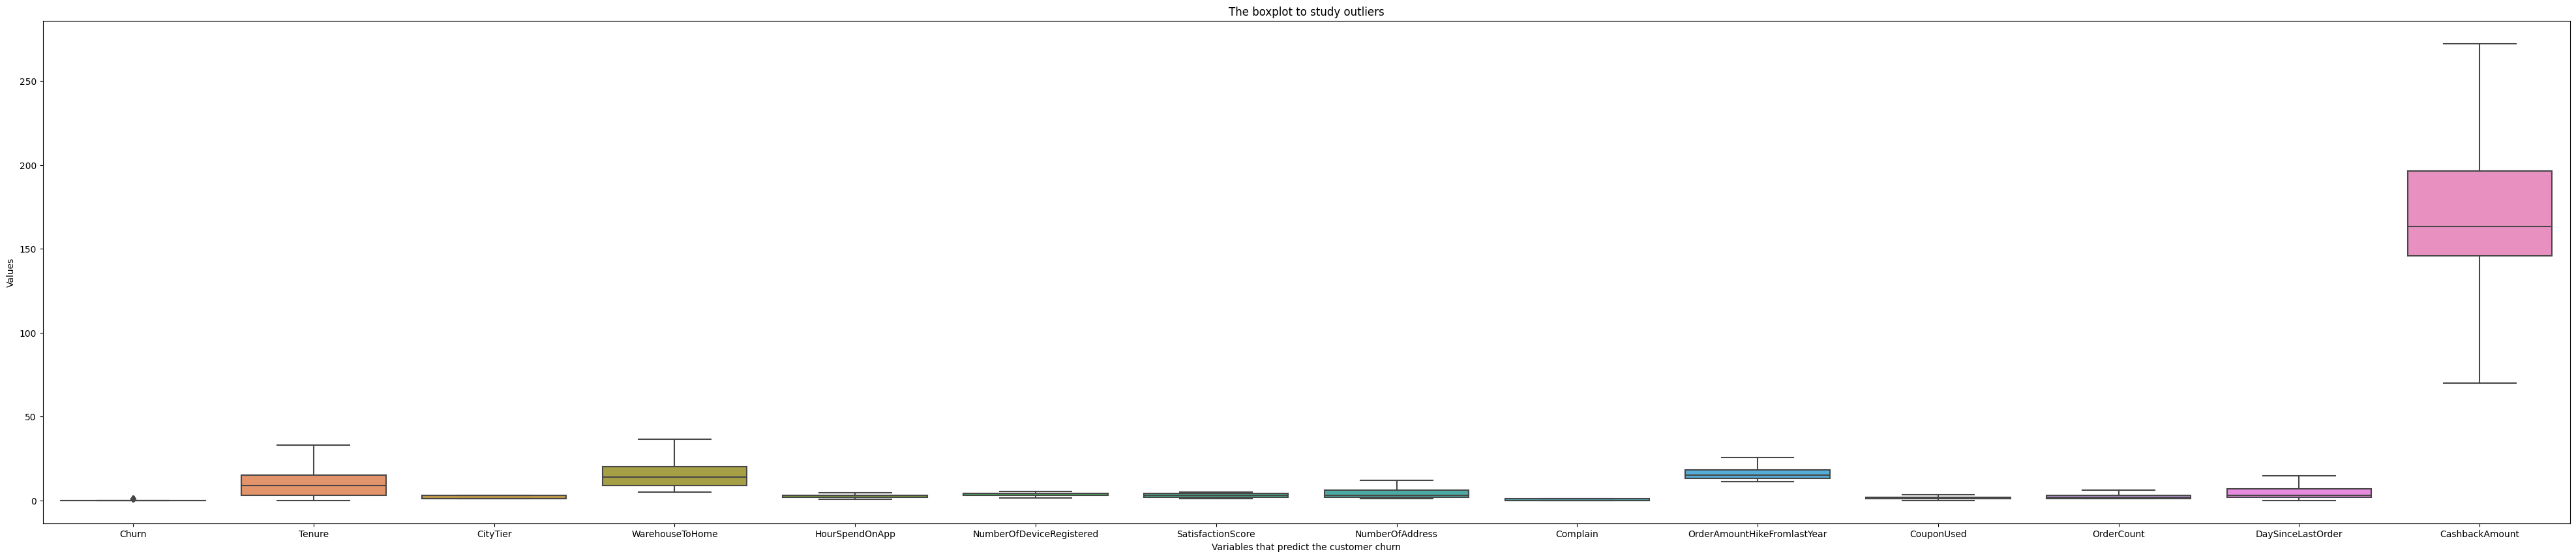

In [ ]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

Here we can see that we have treated all the outliers. The outliers are now replaced with their corresponding upper range or lower range values

#Feature Engineering - Adding new variables

Lets caurve out a new variable -> Average Cashback per order

In [ ]:
df['avg_cashbk_per_order'] = df['CashbackAmount'] / df['OrderCount']

In [ ]:
# Percentage of customer churn
Churn_perc = round((df['Churn'][df['Churn']==1].count()*100/df['Churn'][df['Churn']==0].count()),2)

In [ ]:
print('The average customer churn is:', Churn_perc,'%')

The average customer churn is: 20.25 %


#Exploratory Data Analysis


**1. The Univariate Analysis**

Lets make a list of the categorical and numerical variables these will be helpful in analysing the data efficiently

In [ ]:
cat=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
num =  ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'avg_cashbk_per_order']


In [ ]:
df[cat].describe().T

,count,unique,top,freq
Churn,5630,2,0,4682
PreferredLoginDevice,5630,3,Mobile Phone,2765
CityTier,5630,3,1,3666
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [ ]:
for i in cat:
    print(i)
    print()
    print(df[i].value_counts())
    print()
    print()

Churn

0    4682
1     948
Name: Churn, dtype: int64


PreferredLoginDevice

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


CityTier

1    3666
3    1722
2     242
Name: CityTier, dtype: int64


PreferredPaymentMode

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Gender

Male      3384
Female    2246
Name: Gender, dtype: int64


PreferedOrderCat

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


MaritalStatus

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




In [ ]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.118117,8.291334,0.000000,3.000000,9.00,15.0000,33.00000
WarehouseToHome,5630.0,15.534813,8.089328,5.000000,9.000000,14.00,20.0000,36.50000
HourSpendOnApp,5630.0,2.934636,0.703826,0.500000,2.000000,3.00,3.0000,4.50000
NumberOfDeviceRegistered,5630.0,3.695471,0.942015,1.500000,3.000000,4.00,4.0000,5.50000
SatisfactionScore,5630.0,3.066785,1.380194,1.000000,2.000000,3.00,4.0000,5.00000
NumberOfAddress,5630.0,4.207993,2.555111,1.000000,2.000000,3.00,6.0000,12.00000
Complain,5630.0,0.284902,0.451408,0.000000,0.000000,0.00,1.0000,1.00000
OrderAmountHikeFromlastYear,5630.0,15.671670,3.582823,11.000000,13.000000,15.00,18.0000,25.50000
CouponUsed,5630.0,1.440409,1.071295,0.000000,1.000000,1.00,2.0000,3.50000
OrderCount,5630.0,2.520604,1.711109,1.000000,1.000000,2.00,3.0000,6.00000


array([[<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'WarehouseToHome'}>,
        <Axes: title={'center': 'HourSpendOnApp'}>,
        <Axes: title={'center': 'NumberOfDeviceRegistered'}>],
       [<Axes: title={'center': 'SatisfactionScore'}>,
        <Axes: title={'center': 'NumberOfAddress'}>,
        <Axes: title={'center': 'Complain'}>,
        <Axes: title={'center': 'OrderAmountHikeFromlastYear'}>],
       [<Axes: title={'center': 'CouponUsed'}>,
        <Axes: title={'center': 'OrderCount'}>,
        <Axes: title={'center': 'DaySinceLastOrder'}>,
        <Axes: title={'center': 'CashbackAmount'}>],
       [<Axes: title={'center': 'avg_cashbk_per_order'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

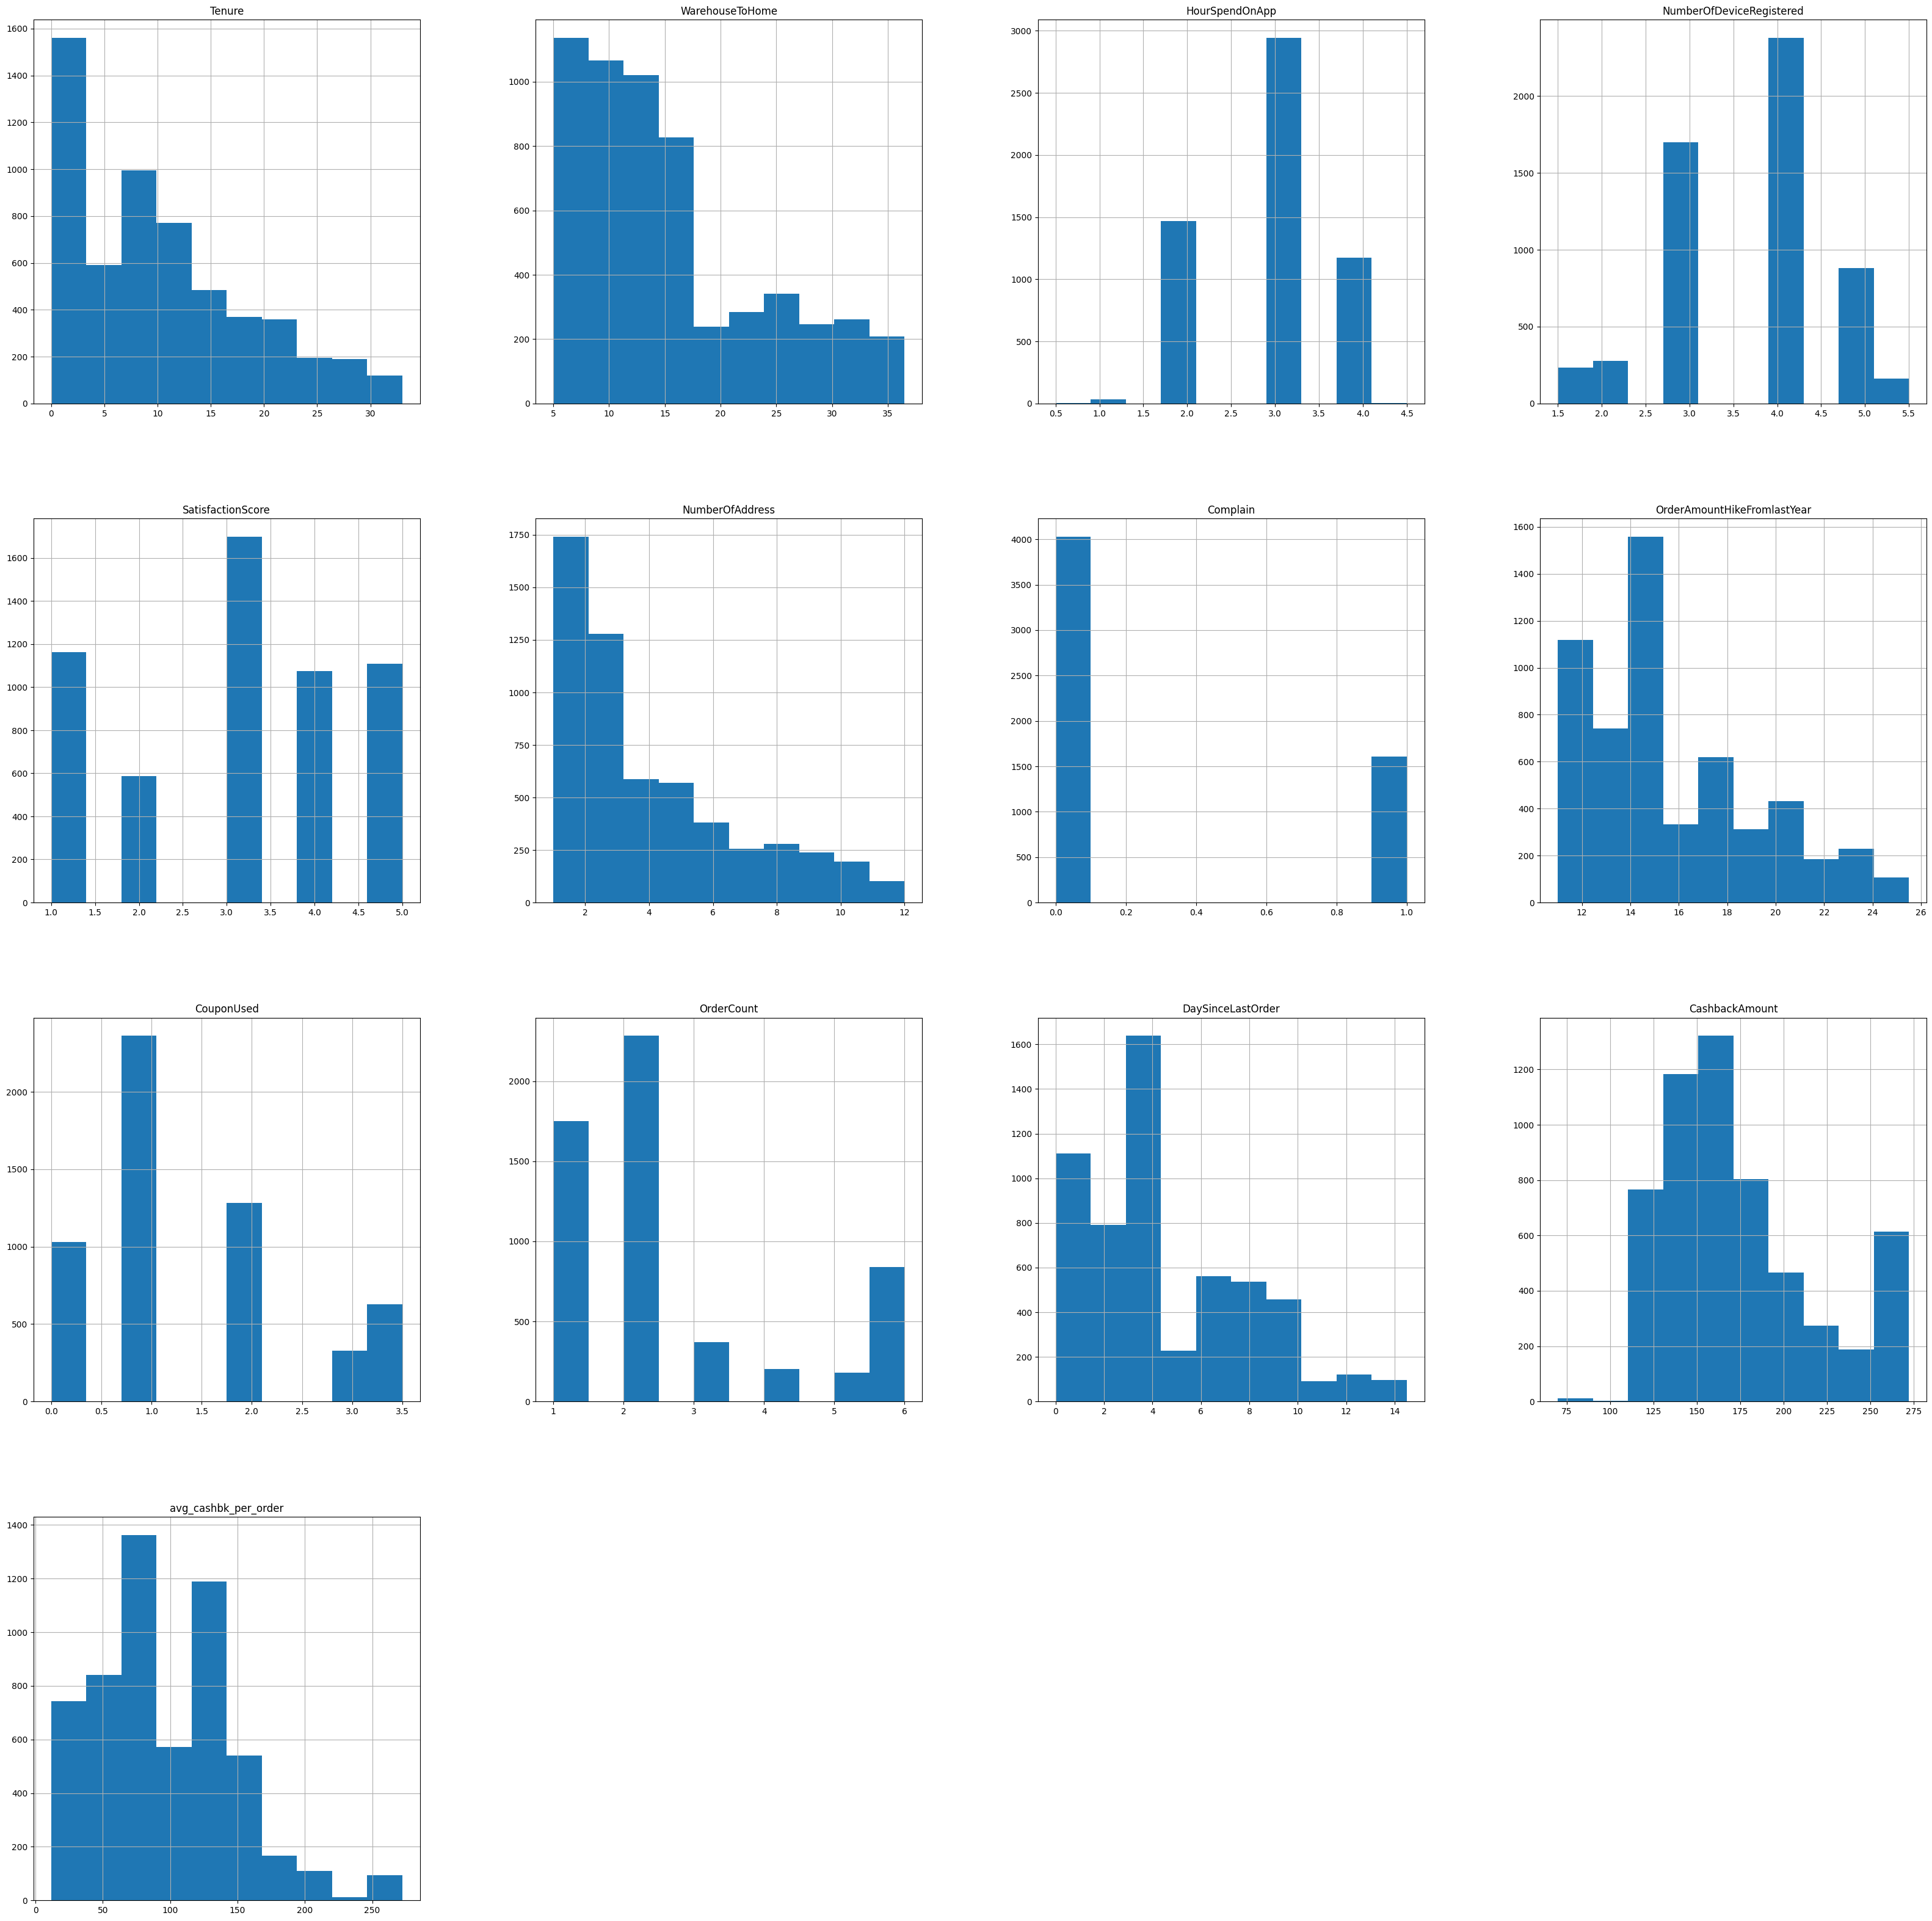

In [ ]:
df[num].hist(figsize=(40,40))

In [ ]:
fig, ax = plt.subplots(8, 2, figsize=(40, 40))
for i, subplot in zip(num, ax.flatten()):
    sns.distplot(df[i], ax=subplot)

In [ ]:
##import numpy as np

#arr_float64 = arr_float.astype(float)  # The solution proposed in other answers
#np.exp(arr_float64)  # This works!

#EDA - Univariate Analysis - Analysing Churn by each Variable

In [ ]:
## defining a tuple for storing the dataframes in a containing information about the contribution each value to the customer churn.
## this was done so that we can quickly automate making such dataframes

#d={}

## running loop for storing the calculating and storing the values in the relevant dataframes  
#for i in df.columns:
  #d[i] = pd.concat([df.groupby(i).Churn.sum(),df[i].value_counts(),round(df.groupby(i).Churn.sum()*100/df[i].value_counts(),2)], axis=1)
  #d[i].reset_index(level=0,inplace=True)
  #d[i] = d[i].rename(columns = {'index':i, 'Churn':'Customers_churned', i:'Total_Customers', 0:'perc_of_total_cust'}, )
    

In [ ]:
#for i in df.columns:
    #print(i)
    #print(d[i])
    #print()

Analysing the Churn by each Variable - Visualising via Graphs¶

In [ ]:
def analysis_chart(variable):
  # definig the plot for matplotlib
  plt.figure(figsize=(20,12))
  fig, ax = plt.subplots()
  # defining the title
  title1 = 'Customers Churn analysed by ' + variable
  plt.title(title1)
  # defining the lines for the y -axis
  line1 = ax.plot(d[variable][variable],d[variable]['Customers_churned'], color='lightskyblue', label = 'Customers churned')
  line2 = ax.plot(d[variable][variable],d[variable]['Total_Customers'], color='dodgerblue', label = 'Total Customers')
  # labelling the x -axis and y-axis
  plt.xlabel (variable)
  plt.ylabel ('No. of customers')
  # rotating the labels on the x-axis for better visualisation
  for tick in ax.get_xticklabels():
    tick.set_rotation(45)
  # defining another axis on the right side of the graph
  ax2=ax.twinx()
  # defining the line for the right side y -axis
  line3 = ax2.plot(d[variable][variable],d[variable]['perc_of_total_cust'], color='yellowgreen', label = 'Churn as Percent of total')
  y = 0*d[variable]['perc_of_total_cust']+20.25
  line4 = ax2.plot(d[variable][variable], y, color='orangered', label='Average customer Churn', linestyle='dashed')
  # labelling the right side y-axis
  plt.ylabel ('percentage of customers churned')
  # adding the three lines to show the legend on the right corner in a coherent place, not doing this will lead to overlapping of legends of lines belonging to left and right y axis
  lines = line1+line2+line3+line4
  labs = [l.get_label() for l in lines]
  ax.legend(lines, labs, bbox_to_anchor=(1.7, 1))
  # adding sns palette for better visualisation
  sns.despine(ax=ax, right=True, left=True)
  sns.despine(ax=ax2, left=True, right=False)


In [ ]:
col = ['Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder']

In [ ]:
analysis_chart

<function __main__.analysis_chart(variable)>

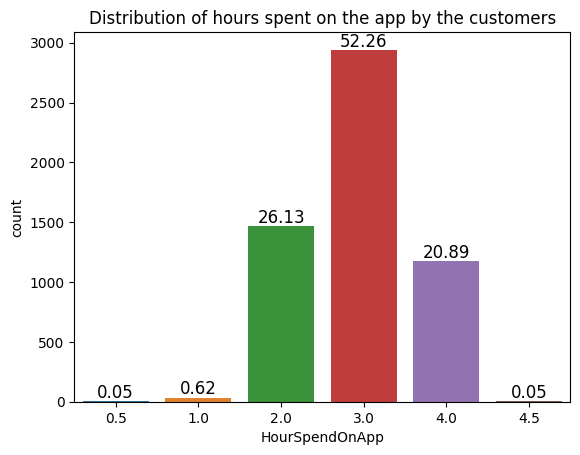

In [ ]:
axx = sns.countplot(x='HourSpendOnApp', data=df)
for a in axx.patches:
    axx.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, 6),textcoords='offset points')
plt.title("Distribution of hours spent on the app by the customers")
plt.show()

In [ ]:
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Tablet'

df['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Tablet          1231
Name: PreferredLoginDevice, dtype: int64

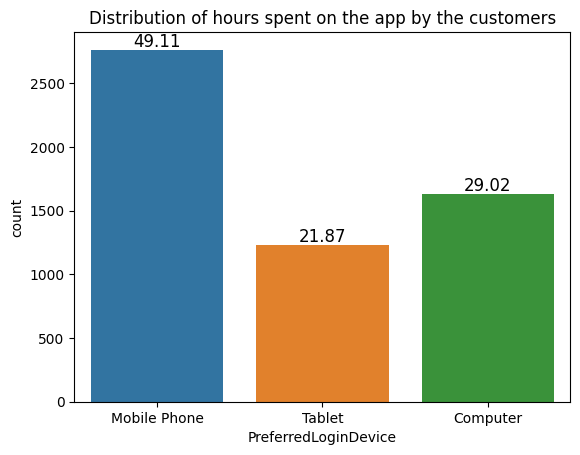

In [ ]:
axx = sns.countplot(x='PreferredLoginDevice', data=df)
for a in axx.patches:
    axx.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, 6),textcoords='offset points')
plt.title("Distribution of hours spent on the app by the customers")
plt.show()

# **Correlation Analysis:**

<ipython-input-37-c81e52776797>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

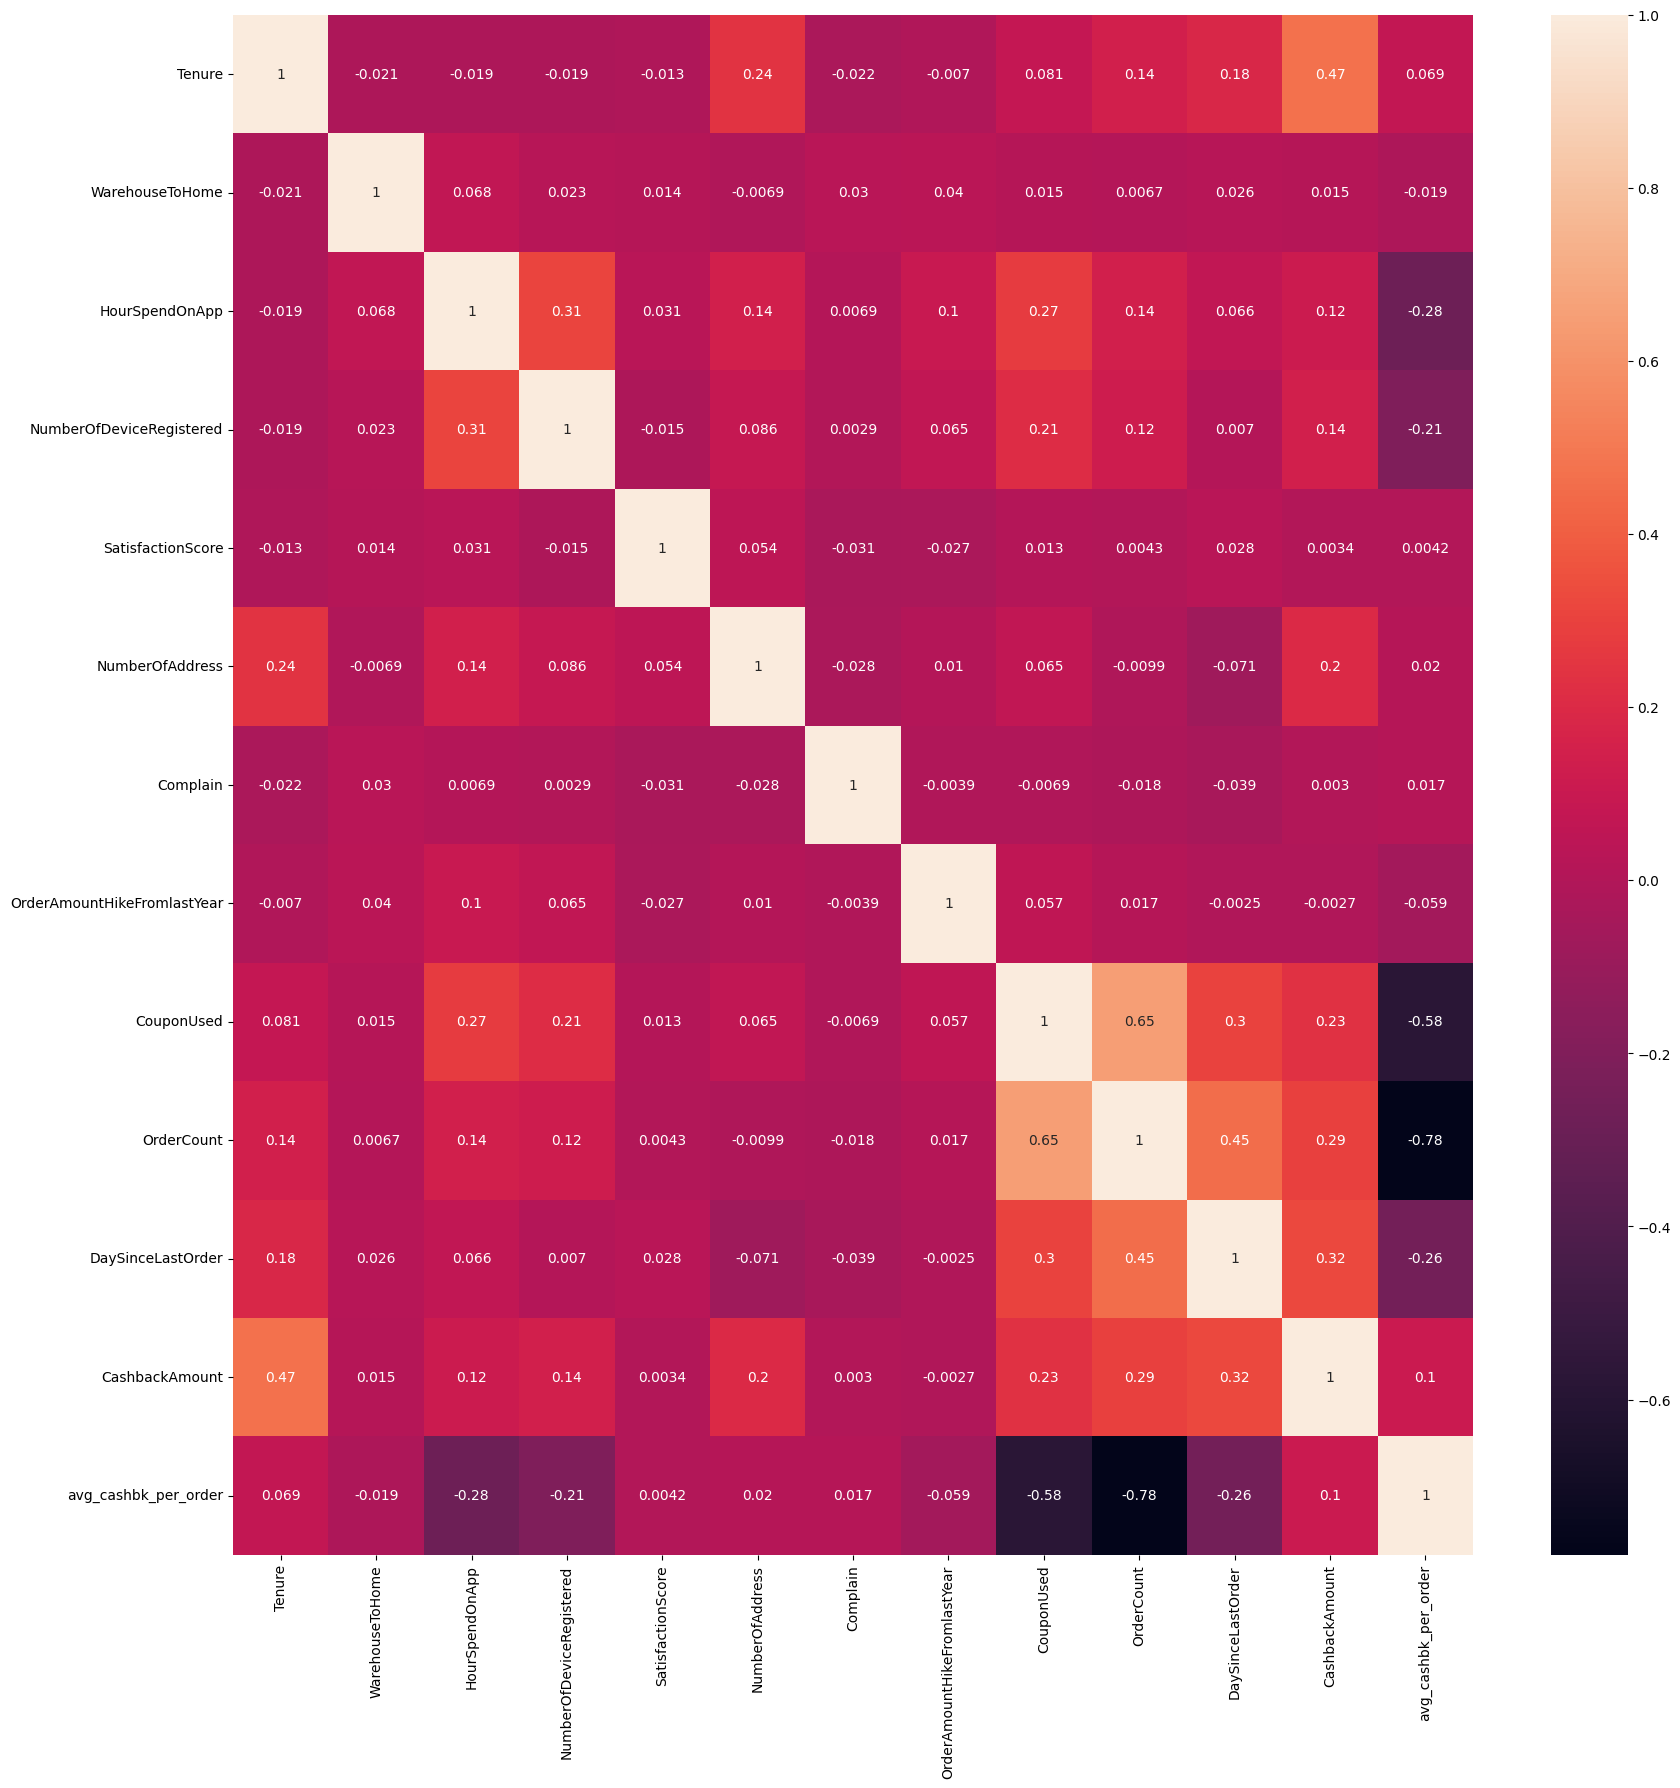

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

#One Hot coding and Scaling of the data

In [ ]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashbk_per_order
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93,159.93
1,1,9.0,Tablet,1,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90,120.90
2,1,9.0,Tablet,1,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28,120.28
3,1,0.0,Tablet,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07,134.07
4,1,0.0,Tablet,1,12.0,CC,Male,3.0,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60,129.60


In [ ]:
df_encoded=df.copy()
df_encoded.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashbk_per_order
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93,159.93
1,1,9.0,Tablet,1,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90,120.90
2,1,9.0,Tablet,1,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28,120.28
3,1,0.0,Tablet,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07,134.07
4,1,0.0,Tablet,1,12.0,CC,Male,3.0,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60,129.60


In [ ]:
df_encoded = pd.get_dummies(df_encoded,drop_first=True)

<ipython-input-40-6e2f7b354839>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_encoded = pd.get_dummies(df_encoded,drop_first=True)
<ipython-input-40-6e2f7b354839>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_encoded = pd.get_dummies(df_encoded,drop_first=True)


In [ ]:
df_encoded.head(10)

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,4.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
1,9.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,...,0,1,1,0,0,1,0,0,0,1
2,9.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,...,0,0,1,0,0,1,0,0,0,1
3,0.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,...,0,0,1,0,1,0,0,0,0,1
4,0.0,12.0,3.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,...,0,0,1,0,0,1,0,0,0,1
5,0.0,22.0,3.0,5.0,5.0,2.0,1.0,22.0,3.5,6.0,...,0,0,0,0,0,0,1,0,0,1
6,9.0,11.0,2.0,3.0,2.0,4.0,0.0,14.0,0.0,1.0,...,0,0,1,0,1,0,0,0,0,0
7,9.0,6.0,3.0,3.0,2.0,3.0,1.0,16.0,2.0,2.0,...,0,0,1,0,0,1,0,0,0,0
8,13.0,9.0,3.0,4.0,3.0,2.0,1.0,14.0,0.0,1.0,...,1,0,1,0,0,1,0,0,0,0
9,9.0,31.0,2.0,5.0,3.0,2.0,0.0,12.0,1.0,1.0,...,0,0,1,0,0,1,0,0,0,1


#Scaling the data

In [ ]:
#importing StandardScaler from SciKit Learn
from sklearn.preprocessing import StandardScaler

In [ ]:
#defining a function standard scaler that will scale the the dataframe
scaler = StandardScaler()

In [ ]:
features = df_encoded[num]
features = scaler.fit_transform(features)

In [ ]:
scaled_df_encoded = df_encoded.copy()

In [ ]:
scaled_df_encoded[num] = features

In [ ]:
#checking the how does the scaled df looks like
scaled_df_encoded

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,-0.737959,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,...,0,0,0,0,1,0,0,0,0,1
1,-0.134866,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,...,0,1,1,0,0,1,0,0,0,1
2,-0.134866,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,...,0,0,1,0,0,1,0,0,0,1
3,-1.220433,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,...,0,0,1,0,1,0,0,0,0,1
4,-1.220433,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,-0.014247,1.788340,0.092878,-1.799993,-1.497592,0.701405,-0.631198,0.649917,-0.411136,-0.304276,...,0,0,1,0,1,0,0,0,1,0
5626,0.347609,-0.313381,0.092878,1.384951,1.400807,0.701405,-0.631198,0.091648,-0.411136,-0.304276,...,0,0,1,0,0,0,0,0,1,0
5627,-1.099814,-0.560642,0.092878,-1.799993,0.676207,-0.472817,1.584290,1.487320,-0.411136,-0.304276,...,0,0,1,0,1,0,0,0,1,0
5628,1.553794,-0.807903,1.513809,1.384951,0.676207,-0.081410,-0.631198,-0.187486,0.522397,-0.304276,...,0,0,1,0,1,0,0,0,1,0


#Building Classification models¶

In [ ]:
scaled_df_encoded

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,-0.737959,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,...,0,0,0,0,1,0,0,0,0,1
1,-0.134866,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,...,0,1,1,0,0,1,0,0,0,1
2,-0.134866,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,...,0,0,1,0,0,1,0,0,0,1
3,-1.220433,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,...,0,0,1,0,1,0,0,0,0,1
4,-1.220433,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,-0.014247,1.788340,0.092878,-1.799993,-1.497592,0.701405,-0.631198,0.649917,-0.411136,-0.304276,...,0,0,1,0,1,0,0,0,1,0
5626,0.347609,-0.313381,0.092878,1.384951,1.400807,0.701405,-0.631198,0.091648,-0.411136,-0.304276,...,0,0,1,0,0,0,0,0,1,0
5627,-1.099814,-0.560642,0.092878,-1.799993,0.676207,-0.472817,1.584290,1.487320,-0.411136,-0.304276,...,0,0,1,0,1,0,0,0,1,0
5628,1.553794,-0.807903,1.513809,1.384951,0.676207,-0.081410,-0.631198,-0.187486,0.522397,-0.304276,...,0,0,1,0,1,0,0,0,1,0


**Correcting the imbalanced data with the help of SMOTE oversampling**

#Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = scaled_df_encoded.drop("Churn_1",axis=1)
y = scaled_df_encoded["Churn_1"]

In [ ]:
print('Before OverSampling, the shape of X: {}'.format(X.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y.shape)) 
  
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0)))

Before OverSampling, the shape of X: (5630, 31)
Before OverSampling, the shape of y: (5630,) 

Before OverSampling, counts of label '1': 948
Before OverSampling, counts of label '0': 4682


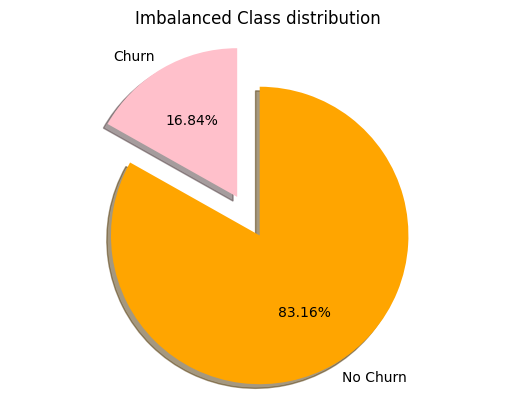

# samples of dataset with No Churn: 4682
# samples of dataset with Churn: 948


In [ ]:
from imblearn.over_sampling import SMOTE 
# Creating dataset
_, class_row_count = np.unique(y, return_counts=True)
class_row_name = ['No Churn', 'Churn']
fig, ax = plt.subplots()
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X, y.ravel())

# Creating color parameters
colors = ("orange", "pink")

# Creating plot
ax.pie(class_row_count, labels=class_row_name, autopct='%1.2f%%',
        shadow=True, explode=[0.3,0], colors = colors, startangle=90, counterclock=False)
ax.axis('equal')  
ax.set_title('Imbalanced Class distribution')

plt.show()
print("# samples of dataset with No Churn: {}".format(class_row_count[0]))
print("# samples of dataset with Churn: {}".format(class_row_count[1]))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score
#Importing Sampling Library
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

# Importing Data Preparation and Modeling Libraries
from sklearn.model_selection import train_test_split,StratifiedKFold,RandomizedSearchCV,GridSearchCV,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PowerTransformer
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.metrics import sensitivity_specificity_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#Importing Sampling Library
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

#Importing Miscellaneous Libraries
from collections import Counter
from numpy import argmax
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width', None)

# **Train and Test Split:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

In [ ]:
y_train.shape, y_test.shape

((4504,), (1126,))

In [ ]:
y_train.value_counts()/len(y_train)

0    0.831705
1    0.168295
Name: Churn_1, dtype: float64

In [ ]:
y_test.value_counts()/len(y_test)

0    0.831261
1    0.168739
Name: Churn_1, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

# **Handling class imbalance using SMOTE based techniques:**

#**A) SMOTE Technique:**

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 3746, 1: 758})
After Counter({0: 3746, 1: 3746})


# **B) ADASYN Technique:**

In [ ]:
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 3746, 1: 758})
After Counter({1: 3749, 0: 3746})


#**MODEL SELECTION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

In [ ]:
model = []
resample = []
precision = []
recall = []
F1score = []
AUCROC = []

In [ ]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

# **Model-1: Logistic Regression:**

## 1. Original Unsampled Data:

In [ ]:
log_model=LogisticRegression()

params={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(X_train, y_train)
clf_LR.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

LogisticRegression(C=1.6378937069540613)

In [ ]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'actual')

Confusion Matrix
[[908  28]
 [ 81 109]] 

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       936
           1       0.80      0.57      0.67       190

    accuracy                           0.90      1126
   macro avg       0.86      0.77      0.81      1126
weighted avg       0.90      0.90      0.90      1126
 

AUC-ROC
0.8979194781826361


## 2.SMOTE Resampling:


In [ ]:
clf_LR.fit(X_train_sm, y_train_sm)
clf_LR.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

LogisticRegression(C=0.26826957952797276, class_weight='balanced')

In [ ]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote')

Confusion Matrix
[[732 204]
 [ 30 160]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.78      0.86       936
           1       0.44      0.84      0.58       190

    accuracy                           0.79      1126
   macro avg       0.70      0.81      0.72      1126
weighted avg       0.87      0.79      0.81      1126
 

AUC-ROC
0.8937753036437247


## 3.ADASYN Resampling:


In [ ]:
clf_LR.fit(X_train_ada, y_train_ada)
clf_LR.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

LogisticRegression(C=0.26826957952797276)

In [ ]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'adasyn')

Confusion Matrix
[[722 214]
 [ 30 160]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.77      0.86       936
           1       0.43      0.84      0.57       190

    accuracy                           0.78      1126
   macro avg       0.69      0.81      0.71      1126
weighted avg       0.87      0.78      0.81      1126
 

AUC-ROC
0.893038686459739


## **Model 2: Random Forest:**

In [ ]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]

## **1. Original Unsampled Data:**

In [ ]:
rf_model = RandomForestClassifier()

rf_params={'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_RF.fit(X_train, y_train)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=11, n_estimators=50)

In [ ]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'actual')

Confusion Matrix
[[927   9]
 [ 48 142]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       936
           1       0.94      0.75      0.83       190

    accuracy                           0.95      1126
   macro avg       0.95      0.87      0.90      1126
weighted avg       0.95      0.95      0.95      1126
 

AUC-ROC
0.9866003148897885


2.SMOTE Resampling

In [ ]:
clf_RF.fit(X_train_sm, y_train_sm)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=13, n_estimators=50)

In [ ]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote')

Confusion Matrix
[[908  28]
 [ 23 167]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       936
           1       0.86      0.88      0.87       190

    accuracy                           0.95      1126
   macro avg       0.92      0.92      0.92      1126
weighted avg       0.96      0.95      0.95      1126
 

AUC-ROC
0.9863810166441747


3.ADASYN Resampling:

In [ ]:
clf_RF.fit(X_train_ada, y_train_ada)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, n_estimators=10)

In [ ]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'adasyn')

Confusion Matrix
[[906  30]
 [ 28 162]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       936
           1       0.84      0.85      0.85       190

    accuracy                           0.95      1126
   macro avg       0.91      0.91      0.91      1126
weighted avg       0.95      0.95      0.95      1126
 

AUC-ROC
0.9772267206477733


# **Decision Tree:**


1. Original Unsampled Data

In [ ]:
tree_model = DecisionTreeClassifier()

tree_param_grid = { 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(X_train, y_train)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=10)

In [ ]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'actual')

Confusion Matrix
[[893  43]
 [ 55 135]] 

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       936
           1       0.76      0.71      0.73       190

    accuracy                           0.91      1126
   macro avg       0.85      0.83      0.84      1126
weighted avg       0.91      0.91      0.91      1126
 

AUC-ROC
0.9140997525865947


# 2.SMOTE Resampling

In [ ]:
clf_DT.fit(X_train_sm, y_train_sm)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=11, min_samples_split=5)

In [ ]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote')

Confusion Matrix
[[858  78]
 [ 29 161]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       936
           1       0.67      0.85      0.75       190

    accuracy                           0.90      1126
   macro avg       0.82      0.88      0.85      1126
weighted avg       0.92      0.90      0.91      1126
 

AUC-ROC
0.9108918128654971


# 3.ADASYN Resampling:

In [ ]:
clf_DT.fit(X_train_ada, y_train_ada)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=15)

In [ ]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'adasyn')

Confusion Matrix
[[868  68]
 [ 40 150]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       936
           1       0.69      0.79      0.74       190

    accuracy                           0.90      1126
   macro avg       0.82      0.86      0.84      1126
weighted avg       0.91      0.90      0.91      1126
 

AUC-ROC
0.927285762483131


# **XGBOOST:**

# 1. Original Unsampled Data

In [ ]:
xgb_model = XGBClassifier()

xgb_params={}

clf_XGB = RandomizedSearchCV(xgb_model, xgb_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_XGB.fit(X_train, y_train)
clf_XGB.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
test_eval(clf_XGB, X_test, y_test, 'XGBoost', 'actual')

Confusion Matrix
[[922  14]
 [ 17 173]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       936
           1       0.93      0.91      0.92       190

    accuracy                           0.97      1126
   macro avg       0.95      0.95      0.95      1126
weighted avg       0.97      0.97      0.97      1126
 

AUC-ROC
0.9892318938371569


# 2.SMOTE Resampling

In [ ]:
clf_XGB.fit(X_train_sm, y_train_sm)
clf_XGB.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
test_eval(clf_RF, X_test, y_test, 'XGBoost', 'smote')

Confusion Matrix
[[906  30]
 [ 28 162]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       936
           1       0.84      0.85      0.85       190

    accuracy                           0.95      1126
   macro avg       0.91      0.91      0.91      1126
weighted avg       0.95      0.95      0.95      1126
 

AUC-ROC
0.9772267206477733


# 3. ADASYN Resampling

In [ ]:
clf_RF.fit(X_train_ada, y_train_ada)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, n_estimators=30)

In [ ]:
test_eval(clf_RF, X_test, y_test, 'XGBoost', 'adasyn')

Confusion Matrix
[[913  23]
 [ 20 170]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       936
           1       0.88      0.89      0.89       190

    accuracy                           0.96      1126
   macro avg       0.93      0.94      0.93      1126
weighted avg       0.96      0.96      0.96      1126
 

AUC-ROC
0.9844185784975258


# **Model Comparision:**

In [ ]:
eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})

In [ ]:
eval_df

,model,resample,precision,recall,f1-score,AUC-ROC
0,Logistic Regression,actual,0.795620,0.573684,0.666667,0.897919
1,Logistic Regression,smote,0.439560,0.842105,0.577617,0.893775
2,Logistic Regression,adasyn,0.427807,0.842105,0.567376,0.893039
3,Random Forest,actual,0.940397,0.747368,0.832845,0.986600
4,Random Forest,smote,0.856410,0.878947,0.867532,0.986381
5,Random Forest,adasyn,0.843750,0.852632,0.848168,0.977227
6,Decision Tree,actual,0.758427,0.710526,0.733696,0.914100
7,Decision Tree,smote,0.673640,0.847368,0.750583,0.910892
8,Decision Tree,adasyn,0.688073,0.789474,0.735294,0.927286
9,XGBoost,actual,0.925134,0.910526,0.917772,0.989232


# **MODEL COMPARISON METRICS:**

In [ ]:
def cross_validation(model,xtrain,ytrain, scoretype, folds):
    scores = cross_val_score(estimator = model,X= xtrain, y = ytrain,scoring = scoretype,cv = folds)
    print("%s: %0.3f (+/- %0.2f)" % ("roc-auc",scores.mean(),scores.std()))
           
def roc_curve(X_test,y_test,model,model_name):
    from sklearn import metrics
    roc_auc = metrics.roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
    fpr,tpr,threshold = metrics.roc_curve(y_test,model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr,tpr,label = "Model:" + model_name +(" (AUC) = %0.2f")%roc_auc)
    plt.plot([0,1],[0,1],"r--")
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.legend(loc = "lower right")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve")
    plt.show()

# **Comibined:**

Text(0, 0.5, 'True')

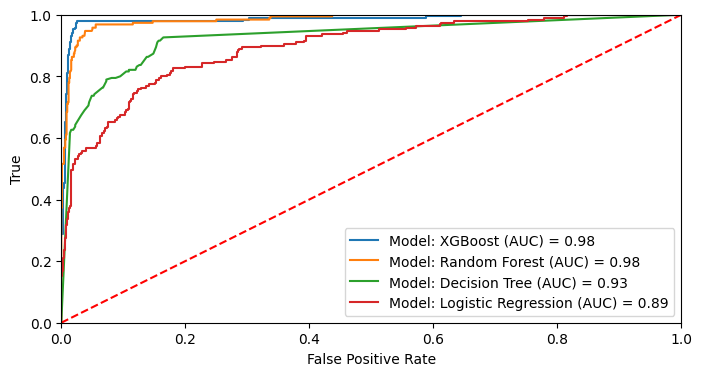

In [ ]:
#Combined results
plt.figure(figsize = (8,4))

roc_auc = metrics.roc_auc_score(y_test,clf_XGB.predict_proba(X_test)[:,1])
fpr,tpr,threshold = metrics.roc_curve(y_test,clf_XGB.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label = "Model: XGBoost" + (" (AUC) = %0.2f")%roc_auc)

roc_auc = metrics.roc_auc_score(y_test,clf_RF.predict_proba(X_test)[:,1])
fpr,tpr,threshold = metrics.roc_curve(y_test,clf_RF.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label = "Model: Random Forest" + (" (AUC) = %0.2f")%roc_auc)

roc_auc = metrics.roc_auc_score(y_test,clf_DT.predict_proba(X_test)[:,1])
fpr,tpr,threshold = metrics.roc_curve(y_test,clf_DT.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label = "Model: Decision Tree" + (" (AUC) = %0.2f")%roc_auc)

roc_auc = metrics.roc_auc_score(y_test,clf_LR.predict_proba(X_test)[:,1])
fpr,tpr,threshold = metrics.roc_curve(y_test,clf_LR.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label = "Model: Logistic Regression" + (" (AUC) = %0.2f")%roc_auc)


plt.plot([0,1],[0,1],"r--")
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc = "lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True")

# **FEATURES IMPORTANCE:**

In [ ]:
def calc_sens_spec(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true,y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    # calculate the sensitivity
    sensitivity = TP / (TP + FN)    
    # calculate the specificity
    specificity = TN / (TN + FP)
    return sensitivity,specificity

# Random Forest

In [ ]:
import time as timer
start = timer.time()
ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor_model.fit(X_train, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_ranfor = ranfor_model.predict(X_test)
y_ranfor_prob = ranfor_model.predict_proba(X_test)

Finished training within 0.95 seconds


Classification report for RF: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       936
           1       0.94      0.87      0.91       190

    accuracy                           0.97      1126
   macro avg       0.96      0.93      0.94      1126
weighted avg       0.97      0.97      0.97      1126

Confusion matrix for RF: 
[[926  10]
 [ 24 166]]
Accuracy score for RF: 0.97
Precision score for RF: 0.94
Recall score for RF: 0.87
F1 score for RF: 0.91
Sensitivity score for RF: 0.87
Specitivity score for RF: 0.99
AUC score for RF: 0.99


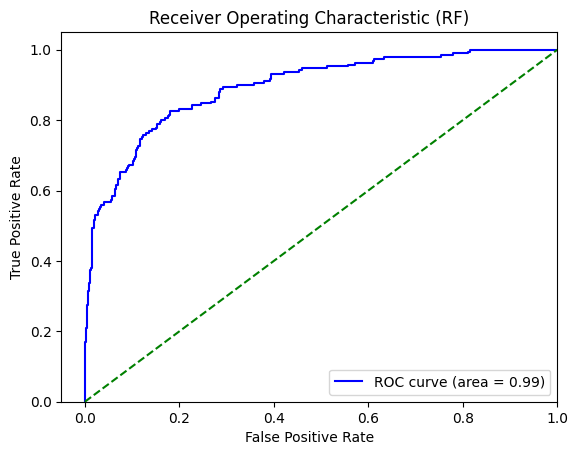

In [ ]:
print("Classification report for RF: \n{}".format(classification_report(y_test,y_ranfor)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(y_test,y_ranfor)))
print("Accuracy score for RF: {:.2f}".format(accuracy_score(y_test,y_ranfor)))
# calculate precision, recall, and f1 scores
prec_ranfor = precision_score(y_test,y_ranfor)
rec_ranfor = recall_score(y_test,y_ranfor)
f1_ranfor = f1_score(y_test,y_ranfor)
print("Precision score for RF: {:.2f}".format(prec_ranfor))
print("Recall score for RF: {:.2f}".format(rec_ranfor))
print("F1 score for RF: {:.2f}".format(f1_ranfor))
# calculate sensitivity, specificity, and auc
sens_ranfor,spec_ranfor = calc_sens_spec(y_test,y_ranfor)

auc_ranfor = roc_auc_score(y_test, y_ranfor_prob[:,1])
print("Sensitivity score for RF: {:.2f}".format(sens_ranfor))
print("Specitivity score for RF: {:.2f}".format(spec_ranfor))
print("AUC score for RF: {:.2f}".format(auc_ranfor))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_ranfor)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (RF)')
ax.legend(loc="lower right")
plt.show()


# Features Importance

<ipython-input-170-1dcb3371e9b5>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(feature_names[ranfor_tree_sort_idx])


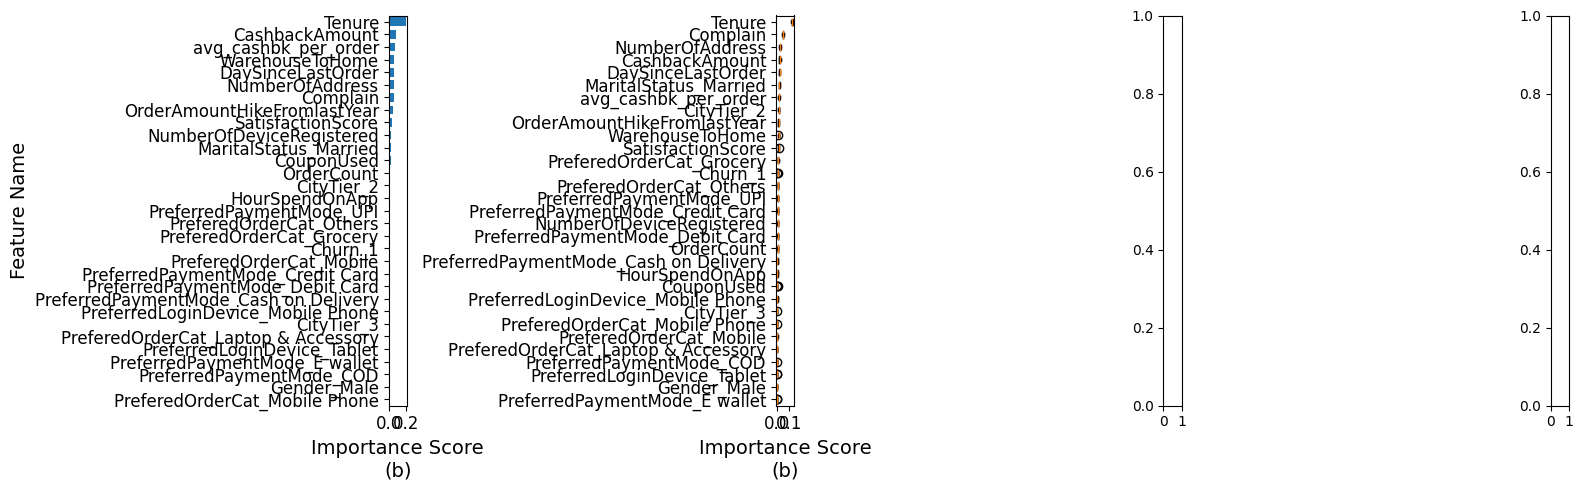

In [ ]:
# feature importance from random forest
from sklearn.inspection import permutation_importance
feature_names = scaled_df_encoded.columns[:-1].to_numpy()
ranfor_perm_imp = permutation_importance(ranfor_model, X_test, y_test, n_repeats=10, random_state=42)
ranfor_perm_sort_idx = ranfor_perm_imp.importances_mean.argsort()

ranfor_tree_sort_idx = np.argsort(ranfor_model.feature_importances_)
ranfor_indices = np.arange(0, len(ranfor_model.feature_importances_)) + 0.5

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 5))
ax1.barh(ranfor_indices,ranfor_model.feature_importances_[ranfor_tree_sort_idx], height=0.7)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlabel("Importance Score\n(b)",fontsize=14)
ax1.set_ylabel("Feature Name",fontsize=14)
ax1.set_yticklabels(feature_names[ranfor_tree_sort_idx])
ax1.set_yticks(ranfor_indices)
ax1.set_ylim((0, len(ranfor_model.feature_importances_)))
ax2.boxplot(ranfor_perm_imp.importances[ranfor_perm_sort_idx].T,vert=False,labels=feature_names[ranfor_perm_sort_idx])
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xlabel("Importance Score\n(b)",fontsize=14)

fig.tight_layout()
fig.savefig("feature_importance.pdf", bbox_inches='tight')
plt.show()


# XGB

In [ ]:
start = timer.time()
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_xgb = xgb_model.predict(X_test)
y_xgb_prob = xgb_model.predict_proba(X_test)


Finished training within 0.95 seconds


Classification report for XGB: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       936
           1       0.93      0.91      0.92       190

    accuracy                           0.97      1126
   macro avg       0.95      0.95      0.95      1126
weighted avg       0.97      0.97      0.97      1126

Confusion matrix for XGB: 
[[922  14]
 [ 17 173]]
Accuracy score for XGB: 0.97
Precision score for XGB: 0.93
Recall score for XGB: 0.91
F1 score for XGB: 0.92
Sensitivity score for XGB: 0.91
Specitivity score for XGB: 0.99
AUC score for XGB: 0.99


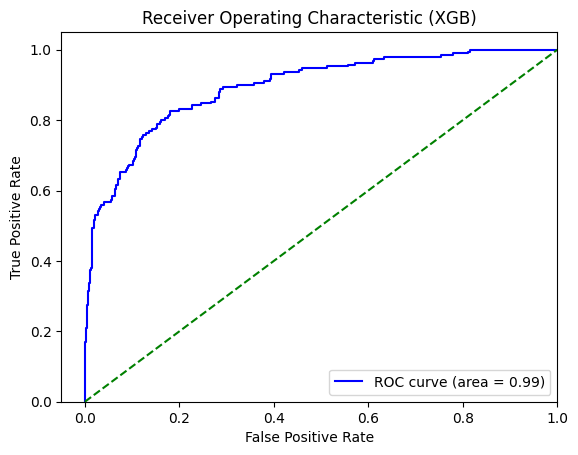

In [ ]:
print("Classification report for XGB: \n{}".format(classification_report(y_test,y_xgb)))
print("Confusion matrix for XGB: \n{}".format(confusion_matrix(y_test,y_xgb)))
print("Accuracy score for XGB: {:.2f}".format(accuracy_score(y_test,y_xgb)))
# calculate precision, recall, and f1 scores
prec_xgb = precision_score(y_test,y_xgb)
rec_xgb = recall_score(y_test,y_xgb)
f1_xgb = f1_score(y_test,y_xgb)
print("Precision score for XGB: {:.2f}".format(prec_xgb))
print("Recall score for XGB: {:.2f}".format(rec_xgb))
print("F1 score for XGB: {:.2f}".format(f1_xgb))
# calculate sensitivity, specificity, and auc
sens_xgb,spec_xgb = calc_sens_spec(y_test,y_xgb)

auc_xgb = roc_auc_score(y_test, y_xgb_prob[:,1])
print("Sensitivity score for XGB: {:.2f}".format(sens_xgb))
print("Specitivity score for XGB: {:.2f}".format(spec_xgb))
print("AUC score for XGB: {:.2f}".format(auc_xgb))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_xgb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (XGB)')
ax.legend(loc="lower right")
plt.show()

#Decision Tree

In [ ]:
start = timer.time()
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_dtree = dtree_model.predict(X_test)
y_dtree_prob = dtree_model.predict_proba(X_test)

Finished training within 0.04 seconds


Classification report for DT: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       936
           1       0.87      0.87      0.87       190

    accuracy                           0.96      1126
   macro avg       0.92      0.92      0.92      1126
weighted avg       0.96      0.96      0.96      1126

Confusion matrix for DT: 
[[912  24]
 [ 24 166]]
Accuracy score for DT: 0.96
Precision score for DT: 0.87
Recall score for DT: 0.87
F1 score for DT: 0.87
Sensitivity score for DT: 0.87
Specitivity score for DT: 0.97
AUC score for DT: 0.92


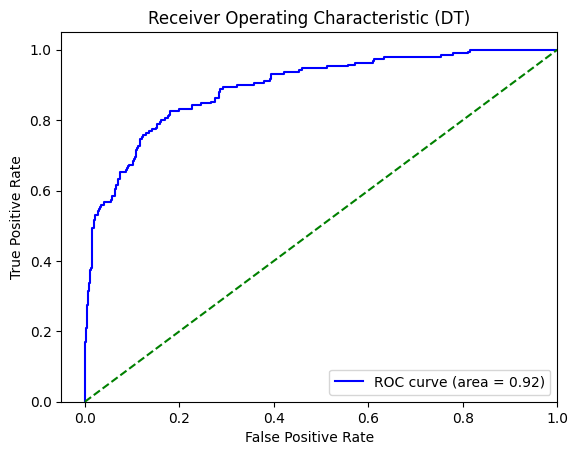

In [ ]:
print("Classification report for DT: \n{}".format(classification_report(y_test,y_dtree)))
print("Confusion matrix for DT: \n{}".format(confusion_matrix(y_test,y_dtree)))
print("Accuracy score for DT: {:.2f}".format(accuracy_score(y_test,y_dtree)))
# calculate precision, recall, and f1 scores
prec_dtree = precision_score(y_test,y_dtree)
rec_dtree = recall_score(y_test,y_dtree)
f1_dtree = f1_score(y_test,y_dtree)
print("Precision score for DT: {:.2f}".format(prec_dtree))
print("Recall score for DT: {:.2f}".format(rec_dtree))
print("F1 score for DT: {:.2f}".format(f1_dtree))
# calculate sensitivity, specificity, and auc
sens_dtree,spec_dtree = calc_sens_spec(y_test,y_dtree)

auc_dtree = roc_auc_score(y_test, y_dtree_prob[:,1])
print("Sensitivity score for DT: {:.2f}".format(sens_dtree))
print("Specitivity score for DT: {:.2f}".format(spec_dtree))
print("AUC score for DT: {:.2f}".format(auc_dtree))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_dtree)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (DT)')
ax.legend(loc="lower right")
plt.show()


# Logistic Regression

In [ ]:
start = timer.time()
logit_model = LogisticRegression(solver='lbfgs', random_state=42)
logit_model.fit(X_train, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_logit = logit_model.predict(X_test)
y_logit_prob = logit_model.predict_proba(X_test)

Finished training within 0.03 seconds


Classification report for LR: 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       936
           1       0.80      0.57      0.67       190

    accuracy                           0.90      1126
   macro avg       0.86      0.77      0.81      1126
weighted avg       0.90      0.90      0.90      1126

Confusion matrix for LR: 
[[909  27]
 [ 81 109]]
Accuracy score for LR: 0.90
Precision score for LR: 0.80
Recall score for LR: 0.57
F1 score for LR: 0.67
Sensitivity score for LR: 0.57
Specitivity score for LR: 0.97
AUC score for LR: 0.90


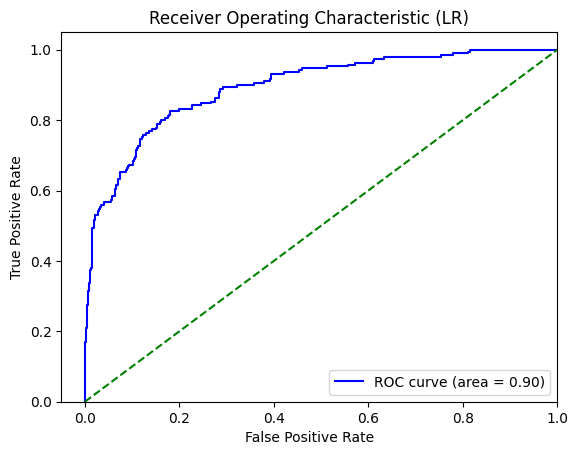

In [ ]:
print("Classification report for LR: \n{}".format(classification_report(y_test,y_logit)))
print("Confusion matrix for LR: \n{}".format(confusion_matrix(y_test,y_logit)))
print("Accuracy score for LR: {:.2f}".format(accuracy_score(y_test,y_logit)))
# calculate precision, recall, and f1 scores
prec_logit = precision_score(y_test,y_logit)
rec_logit = recall_score(y_test,y_logit)
f1_logit = f1_score(y_test,y_logit)
print("Precision score for LR: {:.2f}".format(prec_logit))
print("Recall score for LR: {:.2f}".format(rec_logit))
print("F1 score for LR: {:.2f}".format(f1_logit))
# calculate sensitivity, specificity, and auc
sens_logit,spec_logit = calc_sens_spec(y_test,y_logit)

auc_logit = roc_auc_score(y_test, y_logit_prob[:,1])
print("Sensitivity score for LR: {:.2f}".format(sens_logit))
print("Specitivity score for LR: {:.2f}".format(spec_logit))
print("AUC score for LR: {:.2f}".format(auc_logit))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_logit)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (LR)')
ax.legend(loc="lower right")
plt.show()

# **Combined Results:**

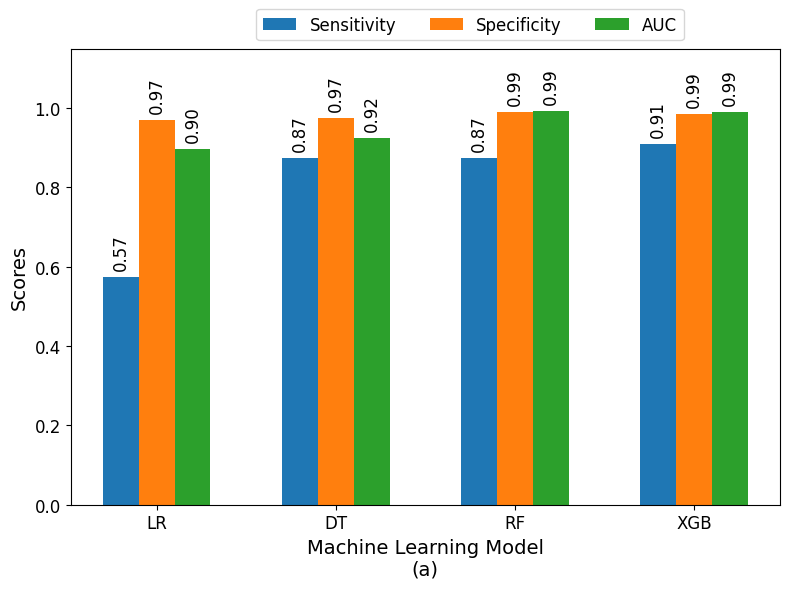

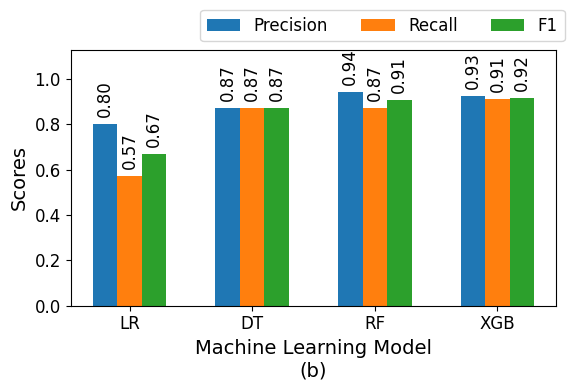

In [ ]:
ml_names = ['LR', 'DT', 'RF', 'XGB']
sens_all = [sens_logit, sens_dtree, sens_ranfor, sens_xgb]
spec_all = [spec_logit, spec_dtree, spec_ranfor, spec_xgb]
auc_all = [ auc_logit, auc_dtree, auc_ranfor, auc_xgb]

prec_all = [prec_logit, prec_dtree, prec_ranfor,  prec_xgb]
rec_all = [rec_logit, rec_dtree, rec_ranfor, rec_xgb]
f1_all = [f1_logit, f1_dtree, f1_ranfor,f1_xgb]

def autolabel(bars):
    """Attach a text label above each bar in displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.20  # the width of the bars
r1 = np.arange(len(ml_names))  # the label locations
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
# plot sensitivity, specificity, and auc
fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, sens_all, width, label='Sensitivity')
bar2 = ax.bar(r2, spec_all, width, label='Specificity')
bar3 = ax.bar(r3, auc_all, width, label='AUC')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.15])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model\n(a)",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_auc.pdf", bbox_inches='tight')
plt.show()

# plot sensitivity, specificity, and auc
fig, ax = plt.subplots(figsize=(6,4))
bar1 = ax.bar(r1, prec_all, width, label='Precision')
bar2 = ax.bar(r2, rec_all, width, label='Recall')
bar3 = ax.bar(r3, f1_all, width, label='F1')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.13])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model\n(b)",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_f1.pdf", bbox_inches='tight')
plt.show()

# Features Importancee using Random Forest

In [ ]:
# fit the model to the training set

ranfor_model.fit(X_train, y_train)
# view the feature scores

feature_scores = pd.Series(ranfor_model.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

Tenure                                   0.205208
CashbackAmount                           0.087430
avg_cashbk_per_order                     0.076266
WarehouseToHome                          0.065783
DaySinceLastOrder                        0.062054
NumberOfAddress                          0.059937
Complain                                 0.058126
OrderAmountHikeFromlastYear              0.052523
SatisfactionScore                        0.044151
NumberOfDeviceRegistered                 0.033590
MaritalStatus_Single                     0.024084
CouponUsed                               0.022191
OrderCount                               0.019941
CityTier_3                               0.019387
HourSpendOnApp                           0.018260
Gender_Male                              0.015731
MaritalStatus_Married                    0.013576
PreferedOrderCat_Laptop & Accessory      0.013070
PreferredLoginDevice_Mobile Phone        0.012502
PreferedOrderCat_Mobile Phone            0.012140


# Features importance using XGBoost

In [ ]:
# fit the model to the training set

xgb_model.fit(X_train, y_train)
# view the feature scores

feature_scores = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

Tenure                                   0.118947
Complain                                 0.075397
PreferedOrderCat_Laptop & Accessory      0.049262
MaritalStatus_Single                     0.041216
DaySinceLastOrder                        0.039773
PreferredPaymentMode_E wallet            0.039176
PreferredPaymentMode_COD                 0.038970
NumberOfAddress                          0.038780
PreferedOrderCat_Others                  0.035239
SatisfactionScore                        0.034301
CityTier_3                               0.029218
OrderCount                               0.029124
NumberOfDeviceRegistered                 0.028223
PreferedOrderCat_Mobile Phone            0.027840
PreferredPaymentMode_Cash on Delivery    0.027464
PreferedOrderCat_Mobile                  0.027129
CashbackAmount                           0.025187
PreferredPaymentMode_Credit Card         0.024466
MaritalStatus_Married                    0.023367
PreferredPaymentMode_UPI                 0.022587


In [ ]:
# Create a series with feature importance 

ranfor_model.feature_importances_

array([0.20520777, 0.06578272, 0.01826019, 0.03358956, 0.04415133,
       0.05993733, 0.05812577, 0.05252322, 0.02219142, 0.01994134,
       0.06205364, 0.08742958, 0.076266  , 0.01250217, 0.01079212,
       0.00561884, 0.01938674, 0.00939462, 0.00404486, 0.01117488,
       0.01204153, 0.01197679, 0.00559585, 0.01573149, 0.00319291,
       0.01307025, 0.00789097, 0.01213981, 0.00232618, 0.01357604,
       0.02408405])

In [ ]:
column_names=[df.columns]
column_names

[Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
        'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
        'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
        'MaritalStatus', 'NumberOfAddress', 'Complain',
        'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
        'DaySinceLastOrder', 'CashbackAmount', 'avg_cashbk_per_order'],
       dtype='object')]

In [ ]:
rfc_imp=[ranfor_model.feature_importances_]

In [ ]:
rfc_colname=[df.columns]

In [ ]:
rfc_dict={'Column_Names_rfc':rfc_colname,'feature_imp_rfc':rfc_imp}

In [ ]:
rfc_feature_imp=pd.DataFrame(rfc_dict)

In [ ]:
rfc_feature_rank=rfc_feature_imp.sort_values(by='feature_imp_rfc',ascending = False)

In [ ]:
rfc_feature_rank

,Column_Names_rfc,feature_imp_rfc
0,"Index(['Churn', 'Tenure', 'PreferredLoginDevic...","[0.20520777167537796, 0.06578272245944583, 0.0..."
